In [1]:
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [3]:
#Check that there are no missing data
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [5]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [ ]:
#1)With optuna method and using train data  choose best method among Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier"
#and optimeze these method based on following parameters.
#max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
#max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
#Evaluate performance of the best method on test data using eval function defined above.
#Note: This should be similar to what we have done in the exercises in class. 

In [7]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00


In [12]:
import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

# Define X_train, y_train, X_test, and y_test here

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 2, X_train.shape[1])
    max_features = trial.suggest_int("max_features", 2, X_train.shape[1])
    method = trial.suggest_categorical("method", ["RandomForest", "XGBoost", "LightGBM", "GradientBoostingClassifier"])

    if method == "RandomForest":
        model = RandomForestClassifier(max_depth=max_depth, max_features=max_features)
    elif method == "XGBoost":
        model = XGBClassifier(max_depth=max_depth, max_features=max_features)
    elif method == "LightGBM":
        model = LGBMClassifier(max_depth=max_depth, max_features=max_features)
    elif method == "GradientBoostingClassifier":
        model = GradientBoostingClassifier(max_depth=max_depth, max_features=max_features)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_method = best_params["method"]

if best_method == "RandomForest":
    best_model = RandomForestClassifier(max_depth=best_params["max_depth"], max_features=best_params["max_features"])
elif best_method == "XGBoost":
    best_model = XGBClassifier(max_depth=best_params["max_depth"], max_features=best_params["max_features"])
elif best_method == "LightGBM":
    best_model = LGBMClassifier(max_depth=best_params["max_depth"], max_features=best_params["max_features"])
elif best_method == "GradientBoostingClassifier":
    best_model = GradientBoostingClassifier(max_depth=best_params["max_depth"], max_features=best_params["max_features"])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[I 2023-04-17 16:08:00,405] A new study created in memory with name: no-name-a8b58632-24d5-4322-a25e-e93230be4672


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:01,515] Trial 0 finished with value: 0.9386724386724387 and parameters: {'max_depth': 5, 'max_features': 26, 'method': 'LightGBM'}. Best is trial 0 with value: 0.9386724386724387.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:02,002] Trial 1 finished with value: 0.9296536796536796 and parameters: {'max_depth': 3, 'max_features': 23, 'method': 'LightGBM'}. Best is trial 0 with value: 0.9386724386724387.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:06,170] Trial 2 finished with value: 0.937950937950938 and parameters: {'max_depth': 9, 'max_features': 24, 'method': 'LightGBM'}. Best is trial 0 with value: 0.9386724386724387.
[I 2023-04-17 16:08:24,173] Trial 3 finished with value: 0.9181096681096681 and parameters: {'max_depth': 31, 'max_features': 3, 'method': 'GradientBoostingClassifier'}. Best is trial 0 with value: 0.9386724386724387.


[16:08:24] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:08:27,097] Trial 4 finished with value: 0.9314574314574314 and parameters: {'max_depth': 10, 'max_features': 32, 'method': 'XGBoost'}. Best is trial 0 with value: 0.9386724386724387.
[I 2023-04-17 16:08:27,284] Trial 5 finished with value: 0.9415584415584416 and parameters: {'max_depth': 26, 'max_features': 24, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:27,464] Trial 6 finished with value: 0.937950937950938 and parameters: {'max_depth': 9, 'max_features': 32, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:08:27,625] Trial 7 finished with value: 0.9314574314574314 and parameters: {'max_depth': 4, 'max_features': 23, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:28,718] Trial 8 finished with value: 0.9195526695526696 and parameters: {'max_depth': 26, 'max_features': 10, 'method': 'RandomForest'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:08:38,210] Trial 9 finished with value: 0.9274891774891775 and parameters: {'max_depth': 16, 'max_features': 28, 'method': 'GradientBoostingClassifier'}. Best is trial 5 with value: 0.9415584415584416.


[16:08:38] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:08:41,313] Trial 10 finished with value: 0.9310966810966811 and parameters: {'max_depth': 24, 'max_features': 16, 'method': 'XGBoost'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:08:41,506] Trial 11 finished with value: 0.9411976911976911 and parameters: {'max_depth': 18, 'max_features': 17, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:43,337] Trial 12 finished with value: 0.924963924963925 and parameters: {'max_depth': 19, 'max_features': 16, 'method': 'RandomForest'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:44,476] Trial 13 finished with value: 0.9415584415584416 and parameters: {'max_depth': 34, 'max_features': 10, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:44,898] Trial 14 finished with value: 0.9415584415584416 and parameters: {'max_depth': 34, 'max_features': 8, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:08:45,102] Trial 15 finished with value: 0.9415584415584416 and parameters: {'max_depth': 28, 'max_features': 12, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:50,299] Trial 16 finished with value: 0.9231601731601732 and parameters: {'max_depth': 34, 'max_features': 5, 'method': 'GradientBoostingClassifier'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:08:51,865] Trial 17 finished with value: 0.9246031746031746 and parameters: {'max_depth': 22, 'max_features': 19, 'method': 'RandomForest'}. Best is trial 5 with value: 0.9415584415584416.


[16:08:51] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:08:56,190] Trial 18 finished with value: 0.933982683982684 and parameters: {'max_depth': 30, 'max_features': 11, 'method': 'XGBoost'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:57,638] Trial 19 finished with value: 0.9415584415584416 and parameters: {'max_depth': 30, 'max_features': 14, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:58,581] Trial 20 finished with value: 0.9415584415584416 and parameters: {'max_depth': 25, 'max_features': 19, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:58,848] Trial 21 finished with value: 0.9415584415584416 and parameters: {'max_depth': 33, 'max_features': 7, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:59,163] Trial 22 finished with value: 0.9415584415584416 and parameters: {'max_depth': 33, 'max_features': 8, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:59,493] Trial 23 finished with value: 0.9415584415584416 and parameters: {'max_depth': 28, 'max_features': 2, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:08:59,831] Trial 24 finished with value: 0.9415584415584416 and parameters: {'max_depth': 22, 'max_features': 7, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:00,204] Trial 25 finished with value: 0.9415584415584416 and parameters: {'max_depth': 34, 'max_features': 21, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:01,932] Trial 26 finished with value: 0.9195526695526696 and parameters: {'max_depth': 28, 'max_features': 13, 'method': 'RandomForest'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:06,987] Trial 27 finished with value: 0.924963924963925 and parameters: {'max_depth': 31, 'max_features': 9, 'method': 'GradientBoostingClassifier'}. Best is trial 5 with value: 0.9415584415584416.


[16:09:07] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:09:12,236] Trial 28 finished with value: 0.9318181818181818 and parameters: {'max_depth': 22, 'max_features': 5, 'method': 'XGBoost'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:12,433] Trial 29 finished with value: 0.9386724386724387 and parameters: {'max_depth': 13, 'max_features': 27, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:12,634] Trial 30 finished with value: 0.9415584415584416 and parameters: {'max_depth': 27, 'max_features': 14, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:12,840] Trial 31 finished with value: 0.9415584415584416 and parameters: {'max_depth': 29, 'max_features': 12, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:13,104] Trial 32 finished with value: 0.9415584415584416 and parameters: {'max_depth': 32, 'max_features': 10, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:13,305] Trial 33 finished with value: 0.9415584415584416 and parameters: {'max_depth': 24, 'max_features': 5, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:13,520] Trial 34 finished with value: 0.9415584415584416 and parameters: {'max_depth': 32, 'max_features': 29, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:13,744] Trial 35 finished with value: 0.9415584415584416 and parameters: {'max_depth': 29, 'max_features': 25, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:13,957] Trial 36 finished with value: 0.9415584415584416 and parameters: {'max_depth': 34, 'max_features': 22, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:14,181] Trial 37 finished with value: 0.9415584415584416 and parameters: {'max_depth': 26, 'max_features': 30, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:15,624] Trial 38 finished with value: 0.9321789321789322 and parameters: {'max_depth': 7, 'max_features': 15, 'method': 'GradientBoostingClassifier'}. Best is trial 5 with value: 0.9415584415584416.


[16:09:15] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:09:18,777] Trial 39 finished with value: 0.9329004329004329 and parameters: {'max_depth': 31, 'max_features': 34, 'method': 'XGBoost'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:18,973] Trial 40 finished with value: 0.9415584415584416 and parameters: {'max_depth': 20, 'max_features': 12, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:19,185] Trial 41 finished with value: 0.9415584415584416 and parameters: {'max_depth': 30, 'max_features': 14, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:19,404] Trial 42 finished with value: 0.9415584415584416 and parameters: {'max_depth': 32, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:19,620] Trial 43 finished with value: 0.9415584415584416 and parameters: {'max_depth': 30, 'max_features': 18, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:19,822] Trial 44 finished with value: 0.9415584415584416 and parameters: {'max_depth': 27, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:20,765] Trial 45 finished with value: 0.920995670995671 and parameters: {'max_depth': 28, 'max_features': 7, 'method': 'RandomForest'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:20,958] Trial 46 finished with value: 0.9415584415584416 and parameters: {'max_depth': 24, 'max_features': 16, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:26,534] Trial 47 finished with value: 0.9227994227994228 and parameters: {'max_depth': 34, 'max_features': 20, 'method': 'GradientBoostingClassifier'}. Best is trial 5 with value: 0.9415584415584416.


[16:09:26] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:09:29,362] Trial 48 finished with value: 0.9347041847041847 and parameters: {'max_depth': 16, 'max_features': 13, 'method': 'XGBoost'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:29,583] Trial 49 finished with value: 0.9415584415584416 and parameters: {'max_depth': 30, 'max_features': 24, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:30,708] Trial 50 finished with value: 0.920995670995671 and parameters: {'max_depth': 32, 'max_features': 10, 'method': 'RandomForest'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:30,912] Trial 51 finished with value: 0.9415584415584416 and parameters: {'max_depth': 25, 'max_features': 18, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:31,115] Trial 52 finished with value: 0.9415584415584416 and parameters: {'max_depth': 26, 'max_features': 20, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:31,313] Trial 53 finished with value: 0.9415584415584416 and parameters: {'max_depth': 23, 'max_features': 17, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:31,517] Trial 54 finished with value: 0.9415584415584416 and parameters: {'max_depth': 20, 'max_features': 15, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:31,739] Trial 55 finished with value: 0.9415584415584416 and parameters: {'max_depth': 29, 'max_features': 6, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:31,942] Trial 56 finished with value: 0.9415584415584416 and parameters: {'max_depth': 33, 'max_features': 23, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:32,162] Trial 57 finished with value: 0.9415584415584416 and parameters: {'max_depth': 27, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:45,061] Trial 58 finished with value: 0.9166666666666666 and parameters: {'max_depth': 25, 'max_features': 3, 'method': 'GradientBoostingClassifier'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:45,158] Trial 59 finished with value: 0.9137806637806638 and parameters: {'max_depth': 2, 'max_features': 26, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[16:09:45] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:09:50,288] Trial 60 finished with value: 0.9329004329004329 and parameters: {'max_depth': 31, 'max_features': 14, 'method': 'XGBoost'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:50,483] Trial 61 finished with value: 0.9415584415584416 and parameters: {'max_depth': 33, 'max_features': 8, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features

[I 2023-04-17 16:09:50,685] Trial 62 finished with value: 0.9415584415584416 and parameters: {'max_depth': 33, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.



[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:50,882] Trial 63 finished with value: 0.9415584415584416 and parameters: {'max_depth': 34, 'max_features': 6, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:51,078] Trial 64 finished with value: 0.9415584415584416 and parameters: {'max_depth': 28, 'max_features': 12, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:51,892] Trial 65 finished with value: 0.9170274170274171 and parameters: {'max_depth': 31, 'max_features': 4, 'method': 'RandomForest'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:52,084] Trial 66 finished with value: 0.9415584415584416 and parameters: {'max_depth': 29, 'max_features': 8, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:52,310] Trial 67 finished with value: 0.9415584415584416 and parameters: {'max_depth': 33, 'max_features': 7, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.
[I 2023-04-17 16:09:52,505] Trial 68 finished with value: 0.9415584415584416 and parameters: {'max_depth': 31, 'max_features': 13, 'method': 'LightGBM'}. Best is trial 5 with value: 0.9415584415584416.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:52,699] Trial 69 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 10, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:09:52,890] Trial 70 finished with value: 0.9393939393939394 and parameters: {'max_depth': 14, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:53,073] Trial 71 finished with value: 0.9422799422799423 and parameters: {'max_depth': 7, 'max_features': 10, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:09:53,235] Trial 72 finished with value: 0.9386724386724387 and parameters: {'max_depth': 5, 'max_features': 10, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:53,450] Trial 73 finished with value: 0.9404761904761905 and parameters: {'max_depth': 10, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:09:53,636] Trial 74 finished with value: 0.9397546897546898 and parameters: {'max_depth': 8, 'max_features': 13, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:53,822] Trial 75 finished with value: 0.9372294372294372 and parameters: {'max_depth': 6, 'max_features': 15, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:09:56,198] Trial 76 finished with value: 0.9289321789321789 and parameters: {'max_depth': 10, 'max_features': 10, 'method': 'GradientBoostingClassifier'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:56,782] Trial 77 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 12, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:09:56,973] Trial 78 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 12, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[16:09:57] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



[I 2023-04-17 16:09:59,327] Trial 79 finished with value: 0.933982683982684 and parameters: {'max_depth': 12, 'max_features': 12, 'method': 'XGBoost'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:09:59,544] Trial 80 finished with value: 0.9404761904761905 and parameters: {'max_depth': 15, 'max_features': 8, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:09:59,762] Trial 81 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:00,091] Trial 82 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:00,577] Trial 83 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:02,411] Trial 84 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:02,680] Trial 85 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:03,822] Trial 86 finished with value: 0.9422799422799423 and parameters: {'max_depth': 12, 'max_features': 11, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:10:04,027] Trial 87 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:04,223] Trial 88 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:10:05,093] Trial 89 finished with value: 0.9170274170274171 and parameters: {'max_depth': 11, 'max_features': 9, 'method': 'RandomForest'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:10:05,292] Trial 90 finished with value: 0.937950937950938 and parameters: {'max_depth': 9, 'max_features': 6, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:05,777] Trial 91 finished with value: 0.9386724386724387 and parameters: {'max_depth': 13, 'max_features': 10, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:10:05,984] Trial 92 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:06,196] Trial 93 finished with value: 0.9397546897546898 and parameters: {'max_depth': 8, 'max_features': 9, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:06,403] Trial 94 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 8, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:06,616] Trial 95 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 8, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:06,826] Trial 96 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 7, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:07,025] Trial 97 finished with value: 0.943001443001443 and parameters: {'max_depth': 11, 'max_features': 7, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.
[I 2023-04-17 16:10:07,220] Trial 98 finished with value: 0.9397546897546898 and parameters: {'max_depth': 8, 'max_features': 4, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-04-17 16:10:07,431] Trial 99 finished with value: 0.9404761904761905 and parameters: {'max_depth': 10, 'max_features': 7, 'method': 'LightGBM'}. Best is trial 69 with value: 0.943001443001443.


[LightGBM] [Warning] Unknown parameter: max_features
Accuracy: 0.943001443001443


In [16]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.4 MB/s eta 0:00:00
 

In [17]:
#2)Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.
from pycaret.classification import *

clf = setup(data=df, target='Converted', train_size=0.7)

best_model = compare_models()

# preprocess test set
X_test_preprocessed = clf.transform(X_test)

preds = predict_model(best_model, data=X_test_preprocessed)

print(preds.columns)

eval(y_test, preds['prediction_label'])



,Description,Value
0,Session id,1659
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(9240, 35)"
4,Transformed data shape,"(9240, 35)"
5,Transformed train set shape,"(6468, 35)"
6,Transformed test set shape,"(2772, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9354,0.9788,0.9106,0.9211,0.9157,0.8633,0.8635,0.4700
xgboost,Extreme Gradient Boosting,0.9331,0.9779,0.9025,0.9224,0.9123,0.8582,0.8584,1.2840
gbc,Gradient Boosting Classifier,0.9252,0.9766,0.8813,0.9213,0.9007,0.8407,0.8414,1.1550
rf,Random Forest Classifier,0.9157,0.9674,0.8644,0.9126,0.8877,0.8204,0.8213,1.9400
ada,Ada Boost Classifier,0.9126,0.9707,0.8708,0.8999,0.8848,0.8145,0.8151,0.5890
et,Extra Trees Classifier,0.9114,0.9623,0.8524,0.9125,0.8813,0.8107,0.8121,1.1820
dt,Decision Tree Classifier,0.8898,0.8856,0.8636,0.8526,0.8579,0.7679,0.7681,0.4560
lda,Linear Discriminant Analysis,0.8305,0.9008,0.7192,0.8201,0.7660,0.6341,0.6377,0.1260
ridge,Ridge Classifier,0.8301,0.0000,0.7160,0.8213,0.7647,0.6327,0.6367,0.1830
lr,Logistic Regression,0.8292,0.8957,0.7204,0.8157,0.7647,0.6314,0.6348,2.0050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

AttributeError: ignored

In [21]:
!pip install autogluon


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━

No path specified. Models will be saved in: "AutogluonModels/ag-20230417_162346/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230417_162346/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    9240
Train Data Columns: 34
Label Column: Converted
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11961.69 MB
	Train Data (Origina

Accuracy: 0.974025974025974
Precision: 0.958958958958959
Recall: 0.9686552072800809


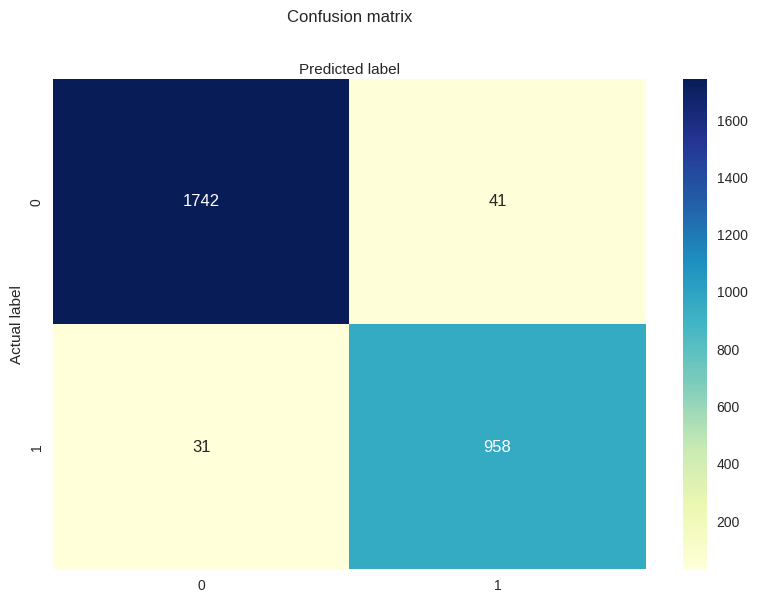

In [23]:
#3) Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

import autogluon.tabular as ag_tabular

predictor = ag_tabular.TabularPredictor(label='Converted')
predictor.fit(train_data=df, hyperparameters='default')

predictions = predictor.predict(data=X_test)

eval(y_test, predictions)
